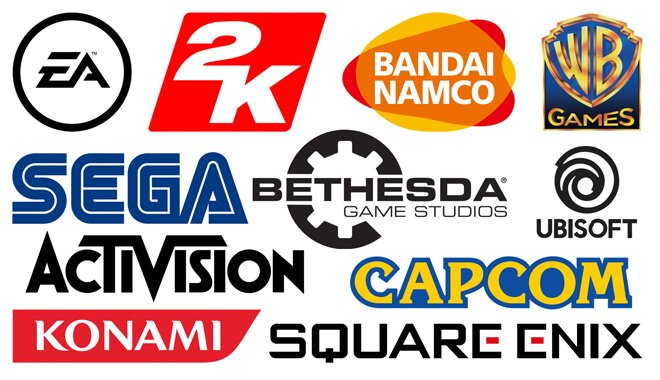

## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 15px 50px;">Table of Content</p>

* [Loading Data 📚](#ldata)
* [Pandas Profiling 🔎](#prof)
* [1. Released games by year 📝](#1)
* [2. Sales analysis 💵](#2)
* [3. Sales distribution 📈](#3)
* [4. Distribution of sales by genre 🙅](#4)
* [5. Sales distribution by ESRB Rating 🔞](#5)
* [6. Publisher analysis 📸](#6)

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
from pandas_profiling import ProfileReport
import pandas.util.testing as tm

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/videogamescompaniesregions/indie-games-developers.csv
/kaggle/input/videogamescompaniesregions/video-games-developers.csv
/kaggle/input/videogames-sales-dataset/XboxOne_GameSales.csv
/kaggle/input/videogames-sales-dataset/PS4_GamesSales.csv
/kaggle/input/videogames-sales-dataset/Video_Games_Sales_as_at_22_Dec_2016.csv
/kaggle/input/videogamesales/vgsales.csv


In [4]:
data_file_path = "/kaggle/input/videogamesales/vgsales.csv"
companie_region_path = "/kaggle/input/videogamescompaniesregions/video-games-developers.csv"
total_sales_column = "Total_Sales"

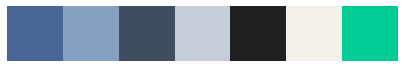

In [5]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]

plt.rcParams['axes.facecolor'] = primary_bgcolor

colors = [primary_blue, primary_blue2, primary_blue3, primary_grey, primary_black, primary_bgcolor, primary_green]
sns.palplot(sns.color_palette(colors))

In [6]:
# Load core data
data_df = pd.read_csv(data_file_path)
data_df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [7]:
# Load companie-region data
region_df = pd.read_csv(companie_region_path)
region_df.head()

Developer    City Administrative division         Country  Est.  \
0        0verflow   Tokyo                     NaN           Japan  1997   
1  11 bit studios  Warsaw    Masovian Voivodeship          Poland  2010   
2      1C Company  Moscow                     NaN          Russia  1991   
3     1-Up Studio   Tokyo                     NaN           Japan  2000   
4        2K Czech    Brno                     NaN  Czech Republic  1997   

    Notable games, series or franchises  \
0      School DaysSummer DaysCross Days   
1                             Frostpunk   
2  King's Bounty: Warriors of the North   
3                              Mother 3   
4                         MafiaMafia II   

                                               Notes  
0  Visual Novel brand (both developer and publisher)  
1                          Indie developer/publisher  
2  Game localization. The game development subsid...  
3  Subsidiary of Nintendo. Formed by former emplo...  
4  Former subsidiary of 2K Games; previously know...

In [8]:
df = pd.merge(data_df, region_df[['Developer', 'Country']], left_on='Publisher', right_on='Developer', how='left')
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales Developer Country  
0     41.49     29.02      3.77         8.46         82.74  Nintendo   Japan  
1     29.08      3.58      6.81         0.77         40.24  Nintendo   Japan  
2     15.85     12.88      3.79         3.31         35.82  Nintendo   Japan  
3     15.75     11.01      3.28         2.96         33.00  Nintendo   Japan  
4     11.27      8.89     10.22         1.00         31.37  Nintendo   Japan

In [9]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Developer',
       'Country'],
      dtype='object')

In [10]:
vgames_profile = ProfileReport(df, title='Video Games Profile Report')

In [11]:
vgames_profile

In [12]:
if 'Total_Shipped' in df.columns:
    df[total_sales_column] = df['Total_Shipped'].fillna(0) + df['Global_Sales'].fillna(0)
else:
    regions = ['NA', 'JP', 'EU', 'Other']
    region_sales_sufix = '_Sales'
    
    df[total_sales_column] = df['Global_Sales']

In [13]:
tdf = df.copy()
# tdf['Year'] = df['Year'].fillna(df['Year'].mean())
tdf = df[df['Year'].notna()] # Carefull about this
tdf = tdf.sort_values('Year', ascending=True)

In [14]:
fig = px.histogram(
    tdf,
    x='Platform',
    animation_frame='Year',
    range_y=[0, 550],
)
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [15]:
top_tdf = tdf.groupby(['Platform', 'Year']).agg({total_sales_column: 'count'}).reset_index()
top_tdf.columns = ['Platform', 'Year', 'Count']
top_tdf = top_tdf[top_tdf['Year'].isin([2016, 2017, 2018, 2019])]
top_tdf = top_tdf[top_tdf['Count'] > top_tdf['Count'].sum() * 0.01]
top_tdf['Year'] = top_tdf['Year'].astype(str)


In [16]:
fig = px.bar(
    top_tdf,
    x='Platform',
    y='Count',
    color='Year',
    barmode="group"
)
fig.update_layout(title="Total released video-games by platform")
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [17]:
platform_tops = ['PS4', 'PSV', 'XOne', 'PC']

In [18]:
platform_tdf = tdf.groupby(['Platform', 'Year']).agg({total_sales_column: 'sum'}).reset_index()
platform_tdf = platform_tdf.sort_values('Year', ascending=True)
platform_tdf.head()

Platform    Year  Total_Sales
0      2600  1980.0        11.38
1      2600  1981.0        35.77
2      2600  1982.0        28.86
3      2600  1983.0         5.83
79      NES  1983.0        10.96

In [19]:
fig = px.bar(
    platform_tdf,
    x='Platform',
    y=total_sales_column,
    animation_frame='Year',
    range_y=[0, 150],
)
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [20]:
platform_top_tdf = platform_tdf[platform_tdf['Year'].isin([2016, 2017, 2018, 2019])]
platform_top_tdf = platform_top_tdf[platform_top_tdf[total_sales_column] > platform_top_tdf[total_sales_column].sum() * 0.005]
platform_top_tdf['Year'] = platform_top_tdf['Year'].astype(str)

fig = px.bar(
    platform_top_tdf,
    x='Platform',
    y=total_sales_column,
    color='Year',
    barmode="group"
)
fig.update_layout(title="Total sales by platforms (Millions)")
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

## Aggregated sales analysis 

In [21]:
platform_sum_tdf = platform_tdf.groupby(['Platform']).agg({total_sales_column: 'sum'}).reset_index()
platform_sum_tdf = platform_sum_tdf[platform_sum_tdf[total_sales_column] > platform_sum_tdf[total_sales_column].sum() * 0.03]

In [22]:
fig = px.bar(
    platform_sum_tdf,
    x='Platform',
    y=total_sales_column,
)
fig.update_layout(title="Total sales of all time in the most important platforms (Millions)")
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [23]:
platform_tmp_tdf = tdf.groupby(['Platform', 'Year']).agg({total_sales_column: ['sum', 'count']})
# Here we can check 

In [24]:
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales Developer Country  \
0     41.49     29.02      3.77         8.46         82.74  Nintendo   Japan   
1     29.08      3.58      6.81         0.77         40.24  Nintendo   Japan   
2     15.85     12.88      3.79         3.31         35.82  Nintendo   Japan   
3     15.75     11.01      3.28         2.96         33.00  Nintendo   Japan   
4     11.27      8.89     10.22         1.00         31.37  Nintendo   Japan   

   Total_Sales  
0        82.74  
1        40.24  
2        35.82  
3        33.00  
4        31.37

In [25]:
if 'Total_Shipped' in df.columns:
    regions = ['NA', 'JP', 'PAL', 'Other']
else:
    regions = ['NA', 'JP', 'EU', 'Other']

region_sales_sufix = '_Sales'
regions_agg = {}

for region in regions:
    regions_agg[region + region_sales_sufix] = 'sum'

regions_agg[total_sales_column] = 'sum'
regions_agg

{'NA_Sales': 'sum',
 'JP_Sales': 'sum',
 'EU_Sales': 'sum',
 'Other_Sales': 'sum',
 'Total_Sales': 'sum'}

In [26]:
geo_tdf = tdf.groupby(['Year']).agg(regions_agg).reset_index()
geo_tdf = geo_tdf.sort_values('Year', ascending=True)
geo_tdf.head(10)

Year  NA_Sales  JP_Sales  EU_Sales  Other_Sales  Total_Sales
0  1980.0     10.59      0.00      0.67         0.12        11.38
1  1981.0     33.40      0.00      1.96         0.32        35.77
2  1982.0     26.92      0.00      1.65         0.31        28.86
3  1983.0      7.76      8.10      0.80         0.14        16.79
4  1984.0     33.28     14.27      2.10         0.70        50.36
5  1985.0     33.73     14.56      4.74         0.92        53.94
6  1986.0     12.50     19.81      2.84         1.93        37.07
7  1987.0      8.46     11.63      1.41         0.20        21.74
8  1988.0     23.87     15.76      6.59         0.99        47.22
9  1989.0     45.15     18.36      8.44         1.50        73.45

In [27]:
fig = go.Figure()

for region in regions:
    
    fig.add_trace(go.Scatter(
        x=geo_tdf['Year'], 
        y=geo_tdf[region + region_sales_sufix], 
        mode='lines',
        name=region,
    ))
fig.update_layout(title="Total sales per year by region (Millions)")
fig.update_xaxes(type='category')
fig.show()

In [28]:
# Thanks to @amritachatterjee09 for this cool function

year_geo_df = tdf[["Year",'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

year_geo_df[['NA_mean','EU_mean','JP_mean','Other_mean']] = year_geo_df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].transform('sum')
year_geo_df = year_geo_df.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
year_geo_df = year_geo_df.drop_duplicates()
year_geo_df = year_geo_df.sort_values("Year")

temp_df1 = pd.DataFrame({'Place': ['NA_Sales']*year_geo_df.shape[0], 'Year':year_geo_df['Year'], 'Sales': year_geo_df['NA_mean']})
temp_df2 = pd.DataFrame({'Place': ['EU_Sales']*year_geo_df.shape[0], 'Year': year_geo_df['Year'], 'Sales': year_geo_df['EU_mean']})
temp_df3 = pd.DataFrame({'Place': ['JP_Sales']*year_geo_df.shape[0], 'Year': year_geo_df['Year'], 'Sales': year_geo_df['JP_mean']})
temp_df4 = pd.DataFrame({'Place': ['Other_Sales']*year_geo_df.shape[0], 'Year': year_geo_df['Year'], 'Sales': year_geo_df['Other_mean']})

final = pd.concat([temp_df1,temp_df2,temp_df3,temp_df4], axis=0)
final = final.sort_values("Year")

fig=px.bar(
    final,
    x='Place', 
    y="Sales", 
    animation_frame="Year",
    animation_group="Place", 
    color="Place", 
    hover_name="Place",
    range_y=[0, 200]
)
fig.update_layout(title="Year sales distribution by region",title_x=0.5)

fig.show()

In [29]:
genre_tdf = tdf.groupby(['Genre']).agg(regions_agg)
genre_tdf = genre_tdf.sort_values(total_sales_column, ascending=False)
genre_tdf.head()

NA_Sales  JP_Sales  EU_Sales  Other_Sales  Total_Sales
Genre                                                               
Action          861.80    158.66    516.48       184.92      1722.88
Sports          670.09    134.76    371.34       132.65      1309.24
Shooter         575.16     38.18    310.45       101.90      1026.20
Role-Playing    326.50    350.29    187.58        59.38       923.84
Platform        445.99    130.65    200.67        51.51       829.15

## Distribution of sales by genres and region

In [30]:
fig = px.imshow(genre_tdf.drop(total_sales_column, 1).T)
fig.update_layout(title="Sales distribution by genre and region (Millions)")
fig.show()

### Last four years

In [31]:
genre_last_tdf = tdf[tdf['Year'].isin([2016, 2017, 2018, 2019])]
genre_last_tdf = genre_last_tdf.groupby(['Genre']).agg(regions_agg)
genre_last_tdf = genre_last_tdf.sort_values(total_sales_column, ascending=False)
genre_last_tdf.head()

NA_Sales  JP_Sales  EU_Sales  Other_Sales  Total_Sales
Genre                                                               
Action            5.87      5.80      6.36         1.83        19.92
Shooter           7.44      0.61      7.70         2.42        18.22
Sports            4.57      0.78      7.36         1.92        14.60
Role-Playing      1.39      3.67      1.29         0.44         6.80
Fighting          1.60      0.64      1.15         0.46         3.86

In [32]:
fig = px.imshow(genre_last_tdf.drop(total_sales_column, 1).T)
fig.update_layout(title="Sales distribution by genre and region (Millions) last four years")
fig.show()

In [33]:
# Reorder df to total genre scattewr plot
genre_total_tdf = genre_tdf.reset_index().sort_values(total_sales_column, ascending=False)

In [34]:
fig = go.Figure()
    
fig.add_trace(go.Scatter(
    x=genre_total_tdf['Genre'], 
    y=genre_total_tdf[total_sales_column], 
    mode='lines+markers',
))
fig.update_layout(title="Total sales by genre (Millions)")
fig.update_xaxes(type='category')
# fig.update_xaxes(categoryorder='total descending')
fig.show()

In [35]:
genre_tops = list(genre_total_tdf.loc[genre_total_tdf[total_sales_column] > genre_total_tdf[total_sales_column].sum() * 0.03, 'Genre'])
genre_tops

['Action',
 'Sports',
 'Shooter',
 'Role-Playing',
 'Platform',
 'Misc',
 'Racing',
 'Fighting',
 'Simulation']

In [36]:
genre_tops_df = tdf[tdf['Genre'].isin(genre_tops)]

fig = px.pie(genre_tops_df,
             values=total_sales_column,
             names='Genre',
             title='Population of European continent',
             hover_data=['Genre'], 
             labels={'lifeExp':'Video Games Genres'},
             hole=0.3,
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [37]:
fig  = go.Figure()
fig.add_trace(go.Pie(
    labels=genre_tops_df['Genre'], 
    values=genre_tops_df[total_sales_column], 
    pull=[0, 0, 0.1, 0.05, 0, 0, 0.05, 0, 0.05],
))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title="Percent of sales by Genre")
fig.show()

### Last four years

In [38]:
# Reorder df to total genre scattewr plot
genre_last_total_tdf = genre_last_tdf.reset_index().sort_values(total_sales_column, ascending=False)

In [39]:
fig = go.Figure()
    
fig.add_trace(go.Scatter(
    x=genre_last_total_tdf['Genre'], 
    y=genre_last_total_tdf[total_sales_column], 
    mode='lines+markers',
))
fig.update_layout(title="Total sales by genre (Millions)")
fig.update_xaxes(type='category')
# fig.update_xaxes(categoryorder='total descending')
fig.show()

In [40]:
if 'ESRB_Rating' in df.columns:
    esrb_tdf = tdf.groupby('ESRB_Rating').agg({total_sales_column: 'sum'}).reset_index()
    esrb_tdf.head(10)

In [41]:
if 'ESRB_Rating' in df.columns:
    fig = px.bar(esrb_tdf, x='ESRB_Rating', y=total_sales_column)
    fig.show()

In [42]:
if 'ESRB_Rating' in df.columns:
    esrb_tops = list(esrb_tdf.loc[esrb_tdf[total_sales_column] > esrb_tdf[total_sales_column].sum() * 0.03, 'ESRB_Rating'])
    esrb_tops

## Distribution of ESRB by region

In [43]:
if 'ESRB_Rating' in df.columns:
    esbr_region_tdf = tdf[tdf['ESRB_Rating'].isin(esrb_tops)].groupby(['ESRB_Rating']).agg(regions_agg)
    esbr_region_tdf.head()

In [44]:
if 'ESRB_Rating' in df.columns:
    z = esbr_region_tdf.drop(total_sales_column, 1).values
    x = esbr_region_tdf.drop(total_sales_column, 1).columns.tolist()
    y = esbr_region_tdf.drop(total_sales_column, 1).index.tolist()

    z_text = np.around(z)

    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='viridis')
    fig.update_layout(title="Sales distribution by genre and region (Millions)")
    fig.show()

## Distribution of ESRB by Genre

In [45]:
if 'ESRB_Rating' in df.columns:
    esrb_genre_tdf = tdf[tdf['ESRB_Rating'].isin(esrb_tops)].groupby(['ESRB_Rating', 'Genre']).agg({total_sales_column: 'sum'}).reset_index()
    esrb_genre_tdf.head(10)

In [46]:
if 'ESRB_Rating' in df.columns:
    esrb_genre_tdf = esrb_genre_tdf[esrb_genre_tdf['Genre'].isin(genre_tops)]
    esrb_genre_tdf = esrb_genre_tdf.pivot(index='ESRB_Rating', columns='Genre', values=total_sales_column)
    esrb_genre_tdf.head()

In [47]:
if 'ESRB_Rating' in df.columns:
    z = esrb_genre_tdf.values
    x = esrb_genre_tdf.columns.tolist()
    y = esrb_genre_tdf.index.tolist()

    z_text = np.around(z)

    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='viridis')
    fig.update_xaxes(categoryorder='total descending')
    fig.update_layout(title="Sales distribution by genre and ESRB (Millions)")
    fig.show()

In [48]:
# Replace nana values in Country before groupby
pub_tdf = tdf.copy()
pub_tdf['Country'] = tdf['Country'].fillna(value='Unknown')

# Groupby publisher and country
pub_tdf = pub_tdf.groupby(['Publisher', 'Country']).agg({total_sales_column: ['sum', 'count']}).reset_index()
pub_tdf.columns = ['Publisher', 'Country', 'Sales_Sum', 'Sales_Count']

pub_tdf = pub_tdf[pub_tdf['Publisher'] != 'Unknown']

pub_tdf.head()

Publisher  Country  Sales_Sum  Sales_Count
0               10TACLE Studios  Unknown       0.11            3
1                    1C Company   Russia       0.10            3
2  20th Century Fox Video Games  Unknown       1.94            5
3                        2D Boy  Unknown       0.04            1
4                           3DO  Unknown      10.12           36

In [49]:
# Filter 5% over sales or 5% over games published
pub_tdf = pub_tdf[(pub_tdf['Sales_Sum'] > pub_tdf['Sales_Sum'].sum() * 0.01) |
                  (pub_tdf['Sales_Count'] > pub_tdf['Sales_Count'].sum() * 0.01)
                 ]

## Publisher sales by year

In [50]:
top_publishers = [
    'Nintendo', 
    'Sony Computer Entertainment',
    'Microsoft Game Studios',
    'Konami Digital Entertainment',
    'Electronic Arts'
]

top_pub_tdf = tdf.loc[:,["Year","Publisher", total_sales_column]]
top_pub_tdf['total_sales'] = top_pub_tdf.groupby([top_pub_tdf.Publisher, top_pub_tdf.Year])[total_sales_column].transform('sum')
top_pub_tdf.drop(total_sales_column, axis=1, inplace=True)

top_pub_tdf = top_pub_tdf.drop_duplicates()
top_pub_tdf = top_pub_tdf[(top_pub_tdf['Year'] >= 2006)]
top_pub_tdf = top_pub_tdf.loc[top_pub_tdf['Publisher'].isin(top_publishers)]
top_pub_tdf = top_pub_tdf.sort_values("Year")

fig=px.bar(
    top_pub_tdf,
    x='Publisher', 
    y="total_sales", 
    animation_frame="Year", 
    animation_group="Publisher", 
    color="Publisher", 
    hover_name="Publisher",
    range_y=[0,200]
)
fig.update_layout(title_text="Top Publisher Game Sale by Year", xaxis_domain=[0.05, 1.0])

fig.show()

## Publisher sales by region

In [51]:
# ad-hoc adjustment for Microsoft and Bandai
microsoft_row = pub_tdf[pub_tdf['Publisher'].str.startswith('Microsoft')].sum()
microsoft_row['Publisher'] = 'Microsoft'
microsoft_row['Country'] = 'United States'
bandai_row = pub_tdf[pub_tdf['Publisher'].str.endswith('Bandai')].sum()
bandai_row['Publisher'] = 'Namco Bandai'
bandai_row['Country'] = 'Japan'

# Drop old columns
pub_tdf = pub_tdf[~pub_tdf['Publisher'].str.startswith('Microsoft')]
pub_tdf = pub_tdf[~pub_tdf['Publisher'].str.endswith('Bandai')]

# Append new rows to teh DF
pub_tdf = pub_tdf.append(microsoft_row, ignore_index=True)
pub_tdf = pub_tdf.append(bandai_row, ignore_index=True)

In [52]:
pub_tdf = pub_tdf.sort_values('Sales_Sum', ascending=False)
pub_tdf.head()

Publisher        Country  Sales_Sum  Sales_Count
12                     Nintendo          Japan    1784.43        696.0
8               Electronic Arts  United States    1093.39       1339.0
2                    Activision  United States     721.41        966.0
14  Sony Computer Entertainment  United States     607.28        682.0
19                      Ubisoft         Europe     473.54        918.0

In [53]:
publisher_tops = list(pub_tdf['Publisher'])
len(publisher_tops)

23

In [54]:
fig = px.scatter(
    pub_tdf,
    x='Publisher',
    y='Sales_Sum',
    size='Sales_Count',
    color='Country',
)
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(title="Sales by publisher and region (Millions)")
fig.show()

In [55]:
# Thanks to https://www.kaggle.com/amritachatterjee09/video-game-sales-eda-with-plotly/notebook
# for this amazing pchart!!

EU = tdf.pivot_table('EU_Sales', columns='Publisher', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:5]
EU_publishers = EU.index

JP = tdf.pivot_table('JP_Sales', columns='Publisher', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
JP_publishers = JP.index

NA = tdf.pivot_table('NA_Sales', columns='Publisher', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:5]
NA_publishers = NA.index

Other = tdf.pivot_table('Other_Sales', columns='Publisher', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:5]
Other_publishers = Other.index

Global = tdf.pivot_table('Global_Sales', columns='Publisher', aggfunc='sum').T
Global = Global.sort_values(by='Global_Sales', ascending=False).iloc[0:5]
Global_publishers = Global.index

In [56]:
# Initialize figure
fig = go.Figure()

# Add Traces
fig.add_trace(
    go.Bar(y=NA['NA_Sales'],
           x=NA_publishers,
           name="North America",
          marker={'color': NA['NA_Sales'],'colorscale': 'tealgrn'}))
fig.add_trace(
    go.Bar(y=EU['EU_Sales'],
           x=EU_publishers,
           name="Europe",
           marker={'color': EU['EU_Sales'],'colorscale': 'tealgrn'},
           visible=False))
fig.add_trace(
    go.Bar(y=JP['JP_Sales'],
           x=JP_publishers,
           name="Japan",
           marker={'color': JP['JP_Sales'],'colorscale': 'tealgrn'},
           visible=False))

fig.add_trace(
    go.Bar(y=Other['Other_Sales'],
           x=Other_publishers,
           name="Others",
           marker={'color': Other['Other_Sales'],'colorscale': 'tealgrn'},
           visible=False))

fig.add_trace(
    go.Bar(y=Global['Global_Sales'],
           x=Global_publishers,
           name="Global",
           marker={'color': Global['Global_Sales'],'colorscale': 'tealgrn'},
               visible=False ))

buttons = []
countries = ['North America', 'Europe', 'Japan', 'Others', 'Global']
for i, country in enumerate(countries):
    buttons.append(dict(
        label=country,
        method="update",
        args=[{"visible": [False] * i + [True] + [False] * (3-i+1)},
              {"title": f"Top 5 Publishers for {country}"}]
    ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=buttons,
        )
    ])

# Set title
fig.update_layout(
    title_text="Top 5 Publishers per region",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

## Genres by publisher

In [57]:
pub_genre_df = tdf.groupby(['Publisher', 'Genre']).agg(regions_agg).reset_index()
pub_genre_df = pub_genre_df[pub_genre_df['Publisher'].isin(publisher_tops)]
pub_genre_df = pub_genre_df[pub_genre_df['Genre'].isin(genre_tops)]
pub_genre_df.head()

Publisher     Genre  NA_Sales  JP_Sales  EU_Sales  Other_Sales  \
19  505 Games    Action      1.31      0.38      1.21         0.31   
21  505 Games  Fighting      0.52      0.06      0.22         0.10   
22  505 Games      Misc      3.63      0.00      0.52         0.34   
23  505 Games  Platform      0.17      0.36      0.01         0.02   
25  505 Games    Racing      0.00      0.00      0.05         0.01   

    Total_Sales  
19         3.22  
21         0.91  
22         4.53  
23         0.57  
25         0.06

In [58]:
fig = px.scatter(
    pub_genre_df,
    x='Publisher',
    y=total_sales_column,
    color='Genre',
)
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(title="Sales by publisher and genre (Millions)")
fig.show()

In [59]:
# Re-create the df to only select top 10 Publishers
pub_genre_df = tdf.groupby(['Publisher', 'Genre']).agg(regions_agg).reset_index()
pub_genre_df = pub_genre_df[pub_genre_df['Publisher'].isin(publisher_tops[:10])]
pub_genre_df = pub_genre_df[pub_genre_df['Genre'].isin(genre_tops)]
pub_genre_df.head()

pub_genre_pivot_df = pub_genre_df.pivot(index='Publisher', columns='Genre', values=total_sales_column)

z = pub_genre_pivot_df.values
x = pub_genre_pivot_df.columns.tolist()
y = pub_genre_pivot_df.index.tolist()

z_text = np.around(z)

# Create heatmap
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='viridis')
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(title="Sales by publisher and genre (Millions)")
fig.show()

## Lets evaluate competence

In [60]:
fig = px.box(tdf[tdf['Genre'].isin(genre_tops)], 
             y=total_sales_column, 
             color='Genre',
             hover_data=['Name', 'Year'],
            )
fig.update_layout(title="Games sells boxplot by genre")
fig.show()

As we can see in this plot, if we focus on the top genres (Action, Sports, Shooters and Role-Plating), there are some out-layers that distort the total sells calculation.
For example:
- In sports genre, Wii sports hold the most parts of the sells but the median is lower than action and shooters for example
- In Role-Playing aswell, the out-layers are not so deviated and there is much competition in the sellings. Also, have in mind that the outlayers are really old (Year)

## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 15px 50px;">Sunburst platforms - genres - publishers</p>

In [61]:
plat_genre_df = tdf[(tdf['Genre'].isin(genre_tops[:4])) & (tdf['Platform'].isin(platform_tops[:4]))]

fig = px.sunburst(plat_genre_df, path=['Genre', 'Platform'], values=total_sales_column)
fig.show()

In [62]:
genre_pub_df = tdf[(tdf['Genre'].isin(genre_tops[:4])) & (tdf['Publisher'].isin(publisher_tops[:5]))]

fig = px.sunburst(genre_pub_df, path=['Genre', 'Publisher'], values=total_sales_column)
fig.show()

In [63]:
plat_pub_df = tdf[(tdf['Platform'].isin(platform_tops[:4])) & (tdf['Publisher'].isin(publisher_tops[:5]))]

fig = px.sunburst(plat_pub_df, path=['Platform', 'Publisher'], values=total_sales_column)
fig.show()

### All together

In [64]:
genre_pub_genre_df = tdf[(tdf['Genre'].isin(genre_tops[:4])) & 
                         (tdf['Publisher'].isin(publisher_tops[:5])) & 
                         (tdf['Platform'].isin(platform_tops[:4]))
                        ]

fig = px.sunburst(genre_pub_genre_df, path=['Genre', 'Platform', 'Publisher'], values=total_sales_column)
fig.show()